# L1.6 Regresión no lineal

En esta lectura generaremos modelos de regresión no lineal: regresión polinomial, *piecewise regression*, y KNN.

Por favor no modifiques las celdas con las instrucciones, y solamente escribe código en las celdas donde así se te indica. **Si en algún momento seleccionas por error una celda de instrucciones y su apariencia cambia, simplemente presiona "Ctrl + Enter".**

Dentro de las celdas de código, las líneas que inician con un "\#" son comentarios y no se ejecutarán, simplemente sirven como instrucciones o descripciones útiles para ustedes.

En esta ocasión trabajaremos con una base de datos relacionada a la calidad del aire y a la temperatura en el estado de Nuevo León. El *Center for Science Education* de la *University Corporation for Atmospheric Research* [indica](https://scied.ucar.edu/learning-zone/air-quality/how-weather-affects-air-quality) que las olas de calor típicamente conllevan a una mala calidad de aire. Por lo mismo, exploraremos esta base de datos para tratar de predecir la calidad del aire a partir de la temperatura.

La base de datos con que trabajaremos, de nombre "L1.6 Calidad del Aire.csv", contiene datos obtenidos de [Purple Air](https://map.purpleair.com/1/mAQI/a1440/p604800/cC0?select=34641#14.65/25.65852/-100.42821), una empresa que diseña y distribuye sensores de calidad de aire, y que mantiene una herramienta gratuita para observar tanto mediciones en tiempo real, como mediciones históricas. Para esta base de datos, consideré la calidad de aire medida por sensores ubicados dentro de la Universidad de Monterrey, del 9 de enero de 2022 al 31 de diciembre de 2022. Adicionalmente, el archivo contiene información meteorológica para las mismas fechas, obtenida de [Meteostat](https://meteostat.net/en/place/mx/san-pedro-garza-garcia?s=76394&t=2022-01-09/2022-12-31), una base de datos climatológicos de libre acceso. La información se extrajo de los sensores de la estación metereológica automática ubicada en el aeropuerto de Monterrey.

En forma de resumen, el archivo incluye 357 observaciones y 5 variables:
 - `Fecha`. En formato M/D/Y.
 - `Temperatura`. Temperaura promedio, en °C.
 - `Presión`. Presión atmosférica, en hPa.
 - `UDEM_Campus_Solar_A`. Índice de calidad de aire ([AQI](https://en.wikipedia.org/wiki/Air_quality_index#United_States)) para partículas con diámetro menor a 2.5 micras (PM2.5), para el sensor A.
 - `UDEM_Campus_Solar_B`. AQI para PM2.5, para el sensor B.

Empecemos este ejercicio, como siempre, importando los datos al ambiente de trabajo. En esta ocasión, nos enfocaremos solamente en el sensor A. Ya que nos interesa realizar un análisis de inferencia, es una buena idea iniciar observando la relación de nuestros datos de forma gráfica. En la siguiente celda, generaremos una gráfica de dispersión de temperatura contra AQI.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    import pandas as pd<br>
    df = pd.read_csv("Calidad del Aire.csv")<br>
    import matplotlib.pyplot as plt<br>
    %matplotlib inline<br>
    plt.scatter(df.Temperatura,df.UDEM_Campus_Solar_A)
</details>

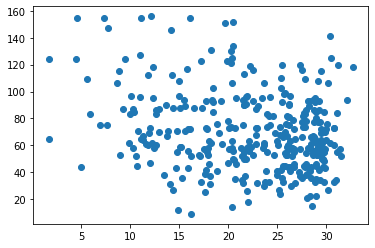

In [ ]:
# Importa la librería pandas

# Lee el archivo

# Importa matplotlib

# Función mágica para graficar en Jupyter Notebook

# Gráfica de dispersión


La imagen muestra que no podemos asumir simplemente una relación lineal. De hecho, los datos nos muestran que probablemente seerá muy complicado realizar predicciones adecuadas usando solamente esta variable. Aún así, continuaremos con el ejercicio. En la siguiente celda dividiremos nuestros datos en entrenamiento y prueba, con una proporción 60/40, usando la función `train_test_split` de sklearn.model_selection.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    from sklearn.model_selection import train_test_split<br>
    X_train, X_test, Y_train, Y_test = train_test_split(df.Temperatura,df.UDEM_Campus_Solar_A,train_size = 0.6)
</details>

In [ ]:
# Importar librería

# Separar datos en train y test, tanto para X como para Y


Iniciemos generando un modelo de regresión lineal simple. En la siguiente celda entrenaremos dicho modelo usando la función `OLS` de la librería statsmodels.api, considerando solamente los datos de entrenamiento. Al final, imprimiremos en consola un resumen de los resultados.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    import statsmodels.api as sm<br>
    ml = sm.OLS(Y_train,sm.add_constant(X_train)).fit()<br>
    print(ml.summary())
</details>

In [1]:
# Importar librería

# Generar y entrenar modelo

# Imprimir resultados


Como se puede observar, el modelo no es particularmente bueno, tiene una R cuadrada ajustada muy pequeña. Aún así, la temperatura tiene una asociación significativa con la calidad del aire de acuerdo al *p-value*. Revisemos el RSE del modelo en los datos de prueba. Calcularemos dicho valor en la siguiente celda en 3 pasos:
1. Callcularemos el valor estimado de Y para los datos de prueba usando la función `predict`.
2. Calcularemos el RSS, el error cuadrado.
3. Calcularemos el RSE, la raíz cuadrada del RSS dividido entre $n-1$, donde $n$ es la cantidad de observaciones en los datos de prueba.

Finalmente, imprimiremos el valor calculado.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    import numpy as np<br>
    yHat_ml = ml.predict(sm.add_constant(X_test))<br>
    RSS_ml = sum((Y_test-yHat_ml)**2)<br>
    RSE_ml = np.sqrt(RSS_ml/(len(Y_test)-1))<br>
    print(RSE_ml)
</details>

In [2]:
# Importar numpy

# Estimar el valor de Y en los datos de prueba

# Calcular RSS

# Calcular RSE

# Imprimir resultado en pantalla


Se tiene un RSE de aproximadamente 25 (el valor variará un poco para cada persona y entre ejecuciones debido a la separación aleatoria de datos). Esto quiere decir que a partir de la temperatura, esperamos predecir un índice de calidad de aire con un error promedio de 25 unidades. Para un índice que cambia de categoría cada 50 unidades (por ejemplo, calidad buena se da en valores entre 0 y 50, mientras que calidad moderada en valores entre 51 y 100), el modelo no es tan inexacto como pensábamos.

Grafiquemos en la siguiente celda las estimaciones del modelo en los datos de entrenamiento encima de los valores reales. Agregaremos el parámetro `label` a la función `plot` para describir el tipo de modelo que usamos. Después, usaremos la función `legend()` para mostrar en la gráfica una etiqueta con esta información. Este tipo de etiquetado será particularmente útil cuando contemos con varios modelos en una misma gráfica.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    plt.scatter(X_test,Y_test)<br>
    plt.plot(X_test,yHat_ml,"r.",label="lineal")<br>
    plt.legend()
</details>

In [3]:
# Gráfica de dispersión con datos reales

# Agregar valores estimados por el modelo lineal como puntos de color rojo

# Incluir leyendas


Pasemos ahora a trabajar con modelos no lineales, iniciando por un modelo de regresión cuadrático, o de orden 2. Aunque podríamos agregar el nuevo término de forma sencilla simplemente multiplicando a X (la temperatura) por sí misma, si planeamos trabajar con modelos de órdenes mayores, esta estrategia será tediosa. Por lo mismo, usaremos la función `PolynomialFeatures` de la librería sklearn.preprocessing; en esta ocasión, solo necesitaremos definir como parámetro `degree=2`. En la misma línea de código realizaremos el ajuste de datos, para los datos de entrenamiento, con la función `fit`.

Esta función necesita que para casos de una sola variable, la información se organice de una forma específica. Por eso, primero cambiaremos la forma del arreglo (los datos de entrenamiento) para que pasen de tener la forma (211,) a tener la forma (211,1). Después, y de forma similar a cuando usamos esta función en la lectura previa, transformaremos los datos con la función `transform` y los convertiremos a un data frame de pandas. Finalmente, entrenaremos al modelo usando los nuevos datos e imprimiremos los resultados.

Es importante mencionar que nos interesa realizar todo el proceso previamente descrito, tanto para los datos de entrenamiento, como para los de prueba, así que tendremos que duplicar la metodología.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    Xtemp_train = X_train.array.reshape(-1,1)<br>
    Xtemp_test = X_test.array.reshape(-1,1)<br>
    from sklearn.preprocessing import PolynomialFeatures<br>
    polyq_train = PolynomialFeatures(degree=2).fit(Xtemp_train)<br>
    polyq_test = PolynomialFeatures(degree=2).fit(Xtemp_test)<br>
    Xq_train = pd.DataFrame(polyq_train.transform(Xtemp_train))<br>
    Xq_test = pd.DataFrame(polyq_test.transform(Xtemp_test))<br>
    mq = sm.OLS(list(Y_train),Xq_train).fit()<br>
    print(mq.summary())
</details>

In [4]:
# Cambiar la forma de los datos


# Importar la librería

# Generar polinomiales de grado 2 y ajustar los datos


# Transformar los datos para que incluyan el polinomial de segundo orden


# Generar y entrenar modelo

# Imprimir resultados


Los resultados muestran una muy ligera mejoría, pero tanto la temperatura, como la temperatura cuadrada, se muestran significativas en el modelo. Revisemos si el error de prueba siminuyó calculando nuevamente el RSE, siguiendo los mismos pasos descritos previamente.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    yHat_mq = mq.predict(Xq_test)<br>
    RSS_mq = sum((list(Y_test)-yHat_mq)**2)<br>
    RSE_mq = np.sqrt(RSS_mq/(len(Y_test)-1))<br>
    print(RSE_mq)
</details>

In [5]:
# Estimar el valor de Y en los datos de prueba

# Calcular RSS

# Calcular RSE

# Imprimir resultado en pantalla


En este caso, no se aprecia una mejoría significativa. Llevemos la regresión polinomial a órdenes mayores, y generemos un modelo de orden 10. En la siguiente celda repetiremos algunas partes del proceso realizado cuando generamos la regresión cuadrática, específicamente, generaremos el polinomial de orden 10 con los datos de entrenamiento (previamente transformados), transformaremos los datos usando dicho polinomial, entrenaremos el modelo, y desplegaremos resultados.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    poly10_train = PolynomialFeatures(degree=10).fit(Xtemp_train)<br>
    poly10_test = PolynomialFeatures(degree=10).fit(Xtemp_test)<br>
    X10_train = pd.DataFrame(poly10_train.transform(Xtemp_train))<br>
    X10_test = pd.DataFrame(poly10_test.transform(Xtemp_test))<br>
    m10 = sm.OLS(list(Y_train),X10_train).fit()<br>
    print(m10.summary())
</details>

In [6]:
# Generar polinomiales de grado 10 y ajustar los datos


# Transformar los datos para que incluyan el polinomial de orden diez


# Generar y entrenar modelo

# Imprimir resultados


Se aprecia una ligera mejoría en la R cuadrada y todas las variables se muestran significativas. Aún así, es poco probable que obtengamos mejores resultados en los datos de prueba. En la siguiente celda revisaremos justamente eso, calculando una vez más, y de la misma forma, el RSE.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    yHat_m10 = m10.predict(X10_test)<br>
    RSS_m10 = sum((list(Y_test)-yHat_m10)**2)<br>
    RSE_m10 = np.sqrt(RSS_m10/(len(Y_test)-1))<br>
    print(RSE_m10)
</details>

In [7]:
# Estimar el valor de Y en los datos de prueba

# Calcular RSS

# Calcular RSE

# Imprimir resultado en pantalla


Efectivamente, no podemos considerar que este modelo sea más preciso. Por simple curiosidad, revisaremos en la siguiente celda la forma de los 3 modelos generados, el lineal, el cuadrático, y el de orden 10. Nos aseguraremos de incluir una etiqueta para cada uno, de forma que sea más sencilla la interpretación de la imagen.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    plt.scatter(X_test,Y_test)<br>
    plt.plot(X_test,yHat_ml,"r.",label="lineal")<br>
    plt.plot(X_test,yHat_mq,"b.",label="cuadrático")<br>
    plt.plot(X_test,yHat_m10,"g.",label="orden 10")<br>
    plt.legend()
</details>

In [8]:
# Gráfica de dispersión con datos reales

# Agregar valores estimados por el modelo lineal como puntos de color rojo

# Agregar valores estimados por el modelo cuadrático como puntos de color azul

# Agregar valores estimados por el modelo de orden 10 como puntos de color verde

# Incluir leyendas


La gráfica nos ayuda a ver la complejidad del modelo de orden 10. Sin embargo, a pesar de dicha complejidad, no consiguió obtener mejores resultados que los modelos sencillo.

Dejemos atrás la regresión polinomial y pasemos ahora a la regresión segmentada, o *piecewise regression*. Hay múltiples formas de llevar a cabo este proceso, pero yo recomiendo usar la función `PiecewiseRegressor` de la librería mlinsights.mlmodel. El único inconveniente es que dicha librería probablemente no esté descargada en tu ambiente de trabajo, por lo que tendrás que descargarla manualmente.

Para hacerlo, regresa al navegadode de Anaconda y abre el Powershell Prompt. Allí, escribe el siguiente código:

`conda install mlinsights --channel conda-forge`

Después de un par de minutos, el sistema te preguntará si deseas confirmas la instalación; solamente debes teclear la letra `y` y dar un Enter. Para corroborar que la librería se instaló de forma adecuada, escribe el siguiente código:

`conda list mlinsights`

Después de unos segundos te aparecerán los datos de la librería, si es que se instaló satisfactoriamente. Ahora sí, en la siguiente celda generaremos una regresión segmentada, donde la función misma determinará la cantidad de segmentos y la posición de los *knots* mediante el modelo `KBinsDiscretizer` de sklearn.preprocessing. En la misma línea de código aprovecharems para ajustar el modelo usando los datos de entrenamiento, incluyendo el término cuadrático, para así crear regresiones cuadráticas en cada segmento.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    from mlinsights.mlmodel import PiecewiseRegressor<br>
    ms = PiecewiseRegressor('bins').fit(Xq_train.iloc[:,1:],Y_train)
</details>

In [9]:
# Importar función

# Generar y entrenar modelo usando el término lineal y el cuadrático


Una vez entrenado el modelo, revisemos qué tan bien predice en los datos de prueba. En la siguiente celda calcularemos el RSE siguiente la misma metodología previamente utilizada.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    yHat_ms = ms.predict(Xq_test.iloc[:,1:])<br>
    RSS_ms = sum((list(Y_test)-yHat_ms)**2)<br>
    RSE_ms = np.sqrt(RSS_ms/(len(Y_test)-1))<br>
    print(RSE_ms)
</details>

In [10]:
# Estimar el valor de Y en los datos de prueba

# Calcular RSS

# Calcular RSE

# Imprimir resultado en pantalla


En la siguiente celda graficaremos el nuevo modelo.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    plt.scatter(X_test,Y_test)<br>
    plt.plot(X_test,yHat_ms,"r.",label="piecewise")<br>
    plt.legend()
</details>

In [11]:
# Gráfica de dispersión con datos reales

# Agregar valores estimados por el modelo segmentado como puntos de color rojo

# Incluir leyendas


El modelo se ve bastante complejo, no tiene un desempeño particularemente más eficiente, y las segmentaciones no parecen seguir ninguna tendencia en particular. Sin lugar a dudas, y como lo pensamos inicialmente, estos datos no se prestan para asumir asociaciones de este tipo.

Pasemos entonces a un modelo no paramétrico, como lo es KNN; dicho modelo no asume ningún tipo de relación entre la variable de entrada y la de salida. Usaremos la función `KNeighbotsRegressor` de sklearn.neighbors para generar el modelo, y la función `fit` para entrenarlo. Probaremos en este caso con 15 vecinos.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    from sklearn.neighbors import KNeighborsRegressor as KNN<br>
    mk = KNN(n_neighbors=15).fit(Xtemp_train,Y_train)
</details>

In [12]:
# Importar función

# Generar y entrenar modelo


Revisemos ahora el error del modelo en los datos de validación, calcularemos una vez más el RSE.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    yHat_mk = mk.predict(Xtemp_test)<br>
    RSS_mk = sum((list(Y_test)-yHat_mk)**2)<br>
    RSE_mk = np.sqrt(RSS_mk/(len(Y_test)-1))<br>
    print(RSE_mk)
</details>

In [13]:
# Estimar el valor de Y en los datos de prueba

# Calcular RSS

# Calcular RSE

# Imprimir resultado en pantalla


Grafiquemos ahora el comportamiento de este modelo. <br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    plt.scatter(X_test,Y_test)<br>
    plt.plot(X_test,yHat_mk,"r.",label="knn")<br>
    plt.legend()
</details>

In [14]:
# Gráfica de dispersión con datos reales

# Agregar valores estimados por el modelo segmentado como puntos de color rojo

# Incluir leyendas


A pesar de que realizamos muchas pruebas con múltiples métodos, hay ocasiones en que los datos no nos darán los resultados esperados, y no podemos forzarlos. Esta es una de las lecciones más difíciles de aprender, darnos cuenta que un resultado negativo no se debe al método que usamos o a nuestra capacidad para programar, sino a los datos con los que contamos.

Es muy probable que incluyendo otras variables al análisis podríamos obtener mejores resultados, o si las mediciones de temperatura y calidad del aire fueran más cercanas (aunque ambas son en Nuevo León, los sensores están en municipios distintos), o si nos enfocáramos en periodos de tiempo distintos. En fin, hay muchos análisis adicionales que se podrían realizar, pero, a partir de estas dos variables tal como se presentan, no hay mucho más que podamos hacer.